In [1]:
pip install essentia

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 19.9 MB/s eta 0:00:00


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
Nokia1_file = "/content/drive/MyDrive/Second Sem/Nokia1.mp3"
Nokia2_file = "/content/drive/MyDrive/Second Sem/Nokia2.mp3"
piano_file = "/content/drive/MyDrive/Second Sem/piano_c.wav"

In [ ]:
ipd.Audio(Nokia1_file)

In [ ]:
ipd.Audio(Nokia2_file)

In [ ]:
ipd.Audio(piano_file)

In [5]:
# load audio files with librosa
Nokia1, sr = librosa.load(Nokia1_file)
Nokia2, _ = librosa.load(Nokia2_file)
piano, _ = librosa.load(piano_file)

Windowing techniques

In [6]:
from essentia.standard import Windowing
from scipy import signal

w_essentia = Windowing(type='hann')  # specify window function in essentia
w_scipy = signal.get_window('triang', 7)  # apply window function in scipy, 7 = no of samples
w_librosa = signal.get_window('hamm', 7)  # apply window function in librosa, 7 = no of samples

In [ ]:
w_essentia

<essentia.standard._create_essentia_class.<locals>.Algo at 0x7f47bb834740>

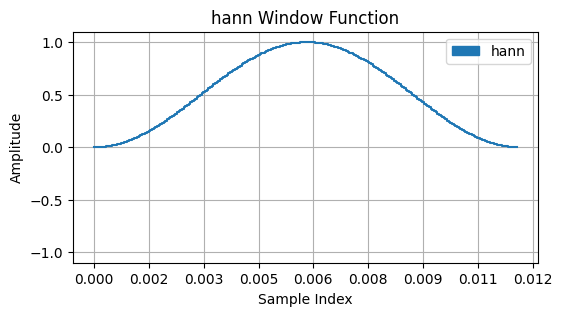

In [10]:
# Define parameters
window_length = 256  # Adjust the length based on your needs
window_type = 'hann'  # Choose the window function

# Generate the window function
window = signal.get_window(window_type, window_length)

# Plot the window function
plt.figure(figsize=(6, 3))
librosa.display.waveshow(window, sr=sr, label=window_type)
plt.title(f'{window_type} Window Function')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

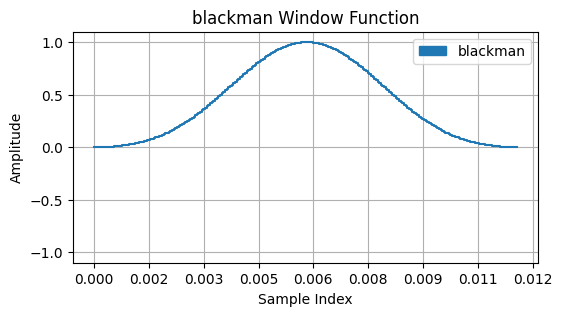

In [12]:
# Define parameters
window_length = 256  # Adjust the length based on your needs
window_type = 'blackman'  # Choose the window function

# Generate the window function
window = signal.get_window(window_type, window_length)

# Plot the window function
plt.figure(figsize=(6, 3))
librosa.display.waveshow(window, sr=sr, label=window_type)
plt.title(f'{window_type} Window Function')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

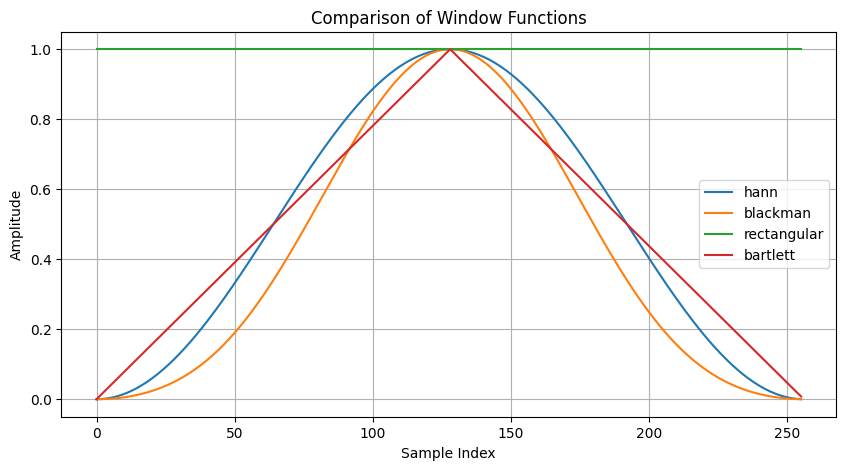

In [15]:
# Define parameters
window_length = 256  # Adjust the length based on your needs
window_types = ['hann', 'blackman','rectangular','bartlett']  # Choose the window functions

# Generate x-axis values (sample indices)
x = np.arange(window_length)

# Plot the window functions
plt.figure(figsize=(10, 5))
for window_type in window_types:
    window = signal.get_window(window_type, window_length)
    plt.plot(x, window, label=window_type)

plt.title('Comparison of Window Functions')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

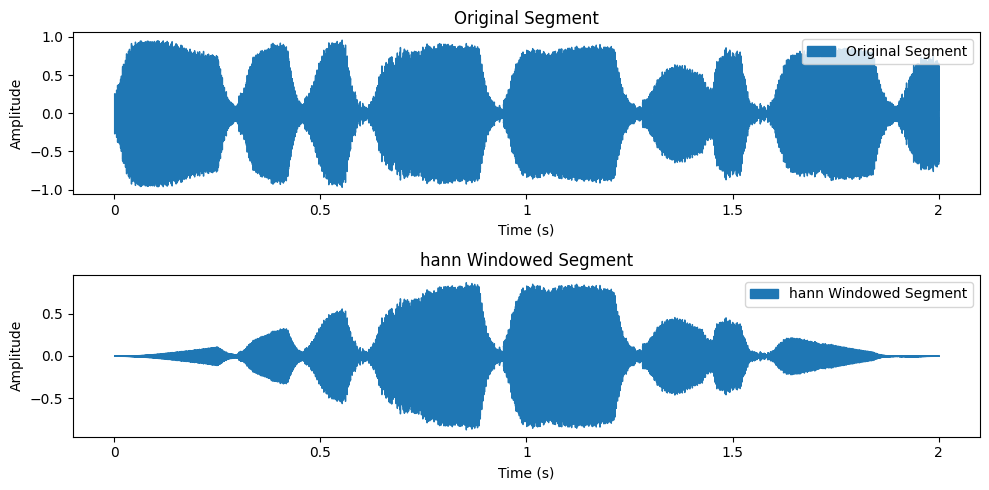

In [17]:
# Load an audio file
y, sr = librosa.load(Nokia1_file)

# Choose a segment of the audio
start_time = 1  # start time in seconds
duration = 2     # duration in seconds
y_segment = y[int(start_time * sr):int((start_time + duration) * sr)]

# Apply a window function (e.g., Hann) to the segment
window_type = 'hann'
window = signal.get_window(window_type, len(y_segment))
y_windowed = y_segment * window

# Plot the original and windowed signals
plt.figure(figsize=(10, 5))

# Plot the original segment
plt.subplot(2, 1, 1)
librosa.display.waveshow(y_segment, sr=sr, label='Original Segment')
plt.title('Original Segment')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

# Plot the windowed segment
plt.subplot(2, 1, 2)
librosa.display.waveshow(y_windowed, sr=sr, label=f'{window_type} Windowed Segment')
plt.title(f'{window_type} Windowed Segment')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

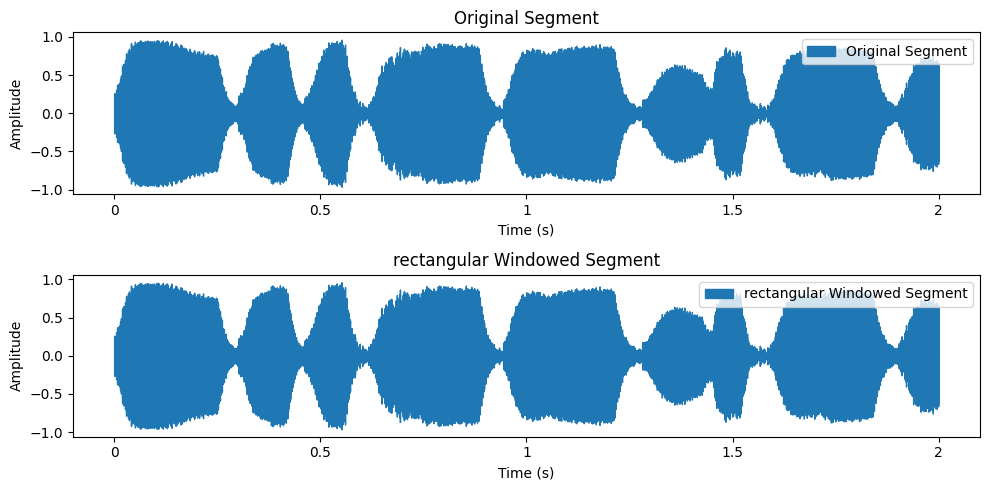

In [ ]:
# Load an audio file
y, sr = librosa.load(Nokia1_file)

# Choose a segment of the audio
start_time = 1  # start time in seconds
duration = 2     # duration in seconds
y_segment = y[int(start_time * sr):int((start_time + duration) * sr)]

# Apply a window function (e.g., Hann) to the segment
window_type = 'rectangular'
window = signal.get_window(window_type, len(y_segment))
y_windowed = y_segment * window

# Plot the original and windowed signals
plt.figure(figsize=(10, 5))

# Plot the original segment
plt.subplot(2, 1, 1)
librosa.display.waveshow(y_segment, sr=sr, label='Original Segment')
plt.title('Original Segment')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

# Plot the windowed segment
plt.subplot(2, 1, 2)
librosa.display.waveshow(y_windowed, sr=sr, label=f'{window_type} Windowed Segment')
plt.title(f'{window_type} Windowed Segment')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

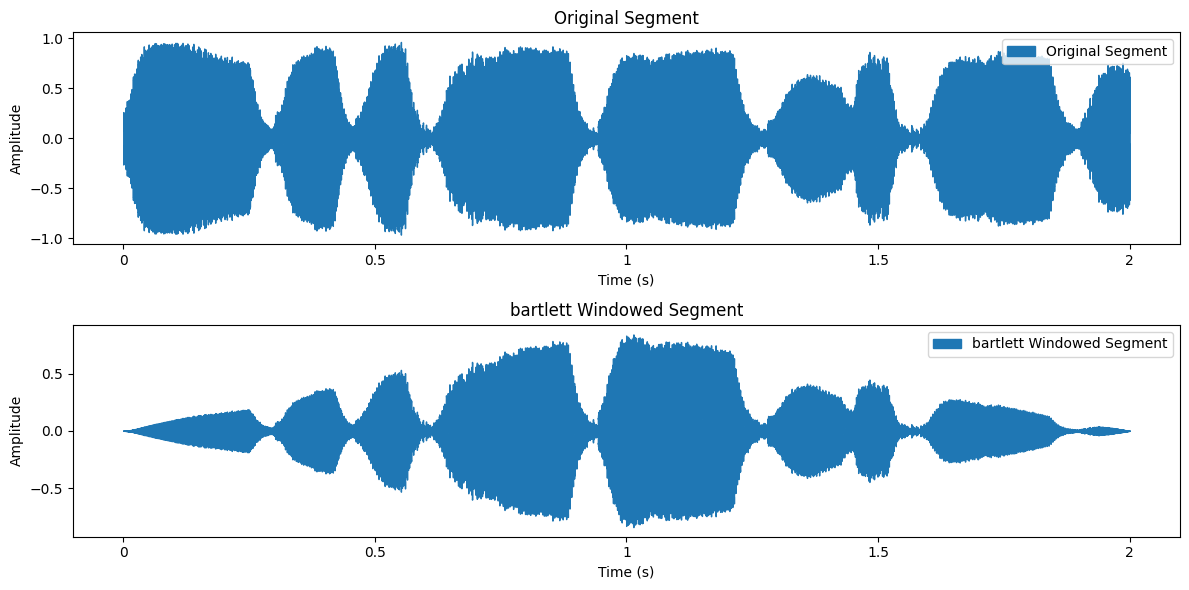

In [ ]:
# Load an audio file
y, sr = librosa.load(Nokia1_file)

# Choose a segment of the audio
start_time = 1  # start time in seconds
duration = 2     # duration in seconds
y_segment = y[int(start_time * sr):int((start_time + duration) * sr)]

# Apply a window function (e.g., Hann) to the segment
window_type = 'bartlett'
window = signal.get_window(window_type, len(y_segment))
y_windowed = y_segment * window

# Plot the original and windowed signals
plt.figure(figsize=(12, 6))

# Plot the original segment
plt.subplot(2, 1, 1)
librosa.display.waveshow(y_segment, sr=sr, label='Original Segment')
plt.title('Original Segment')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

# Plot the windowed segment
plt.subplot(2, 1, 2)
librosa.display.waveshow(y_windowed, sr=sr, label=f'{window_type} Windowed Segment')
plt.title(f'{window_type} Windowed Segment')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

**Zero-crossing rate with Librosa**

In [ ]:
FRAME_SIZE = 1024
HOP_LENGTH = 512

In [ ]:
zcr_Nokia1 = librosa.feature.zero_crossing_rate(Nokia1, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
zcr_Nokia2 = librosa.feature.zero_crossing_rate(Nokia2, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
zcr_piano = librosa.feature.zero_crossing_rate(piano, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

In [ ]:
frames1 = range(len(rms_Nokia1))
t1 = librosa.frames_to_time(frames1, hop_length=HOP_LENGTH)

frames2 = range(len(rms_Nokia2))
t2 = librosa.frames_to_time(frames2, hop_length=HOP_LENGTH)

frames3 = range(len(rms_piano))
t3 = librosa.frames_to_time(frames3, hop_length=HOP_LENGTH)

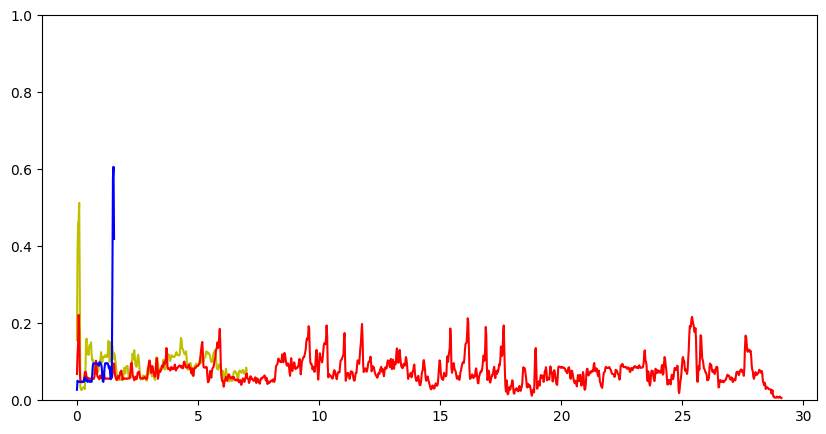

In [ ]:
plt.figure(figsize=(10, 5))

plt.plot(t1, zcr_Nokia1, color="y")
plt.plot(t2, zcr_Nokia2, color="r")
plt.plot(t3, zcr_piano, color="b")
plt.ylim(0, 1)
plt.show()

**ZCR: Voice vs Noise**

In [ ]:
# get ZCR
zcr_voice = librosa.feature.zero_crossing_rate(Nokia1, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
zcr_noise = librosa.feature.zero_crossing_rate(Nokia2, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

In [ ]:
frames = range(len(zcr_voice))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

frames2 = range(len(zcr_noise))
t2 = librosa.frames_to_time(frames2, hop_length=HOP_LENGTH)

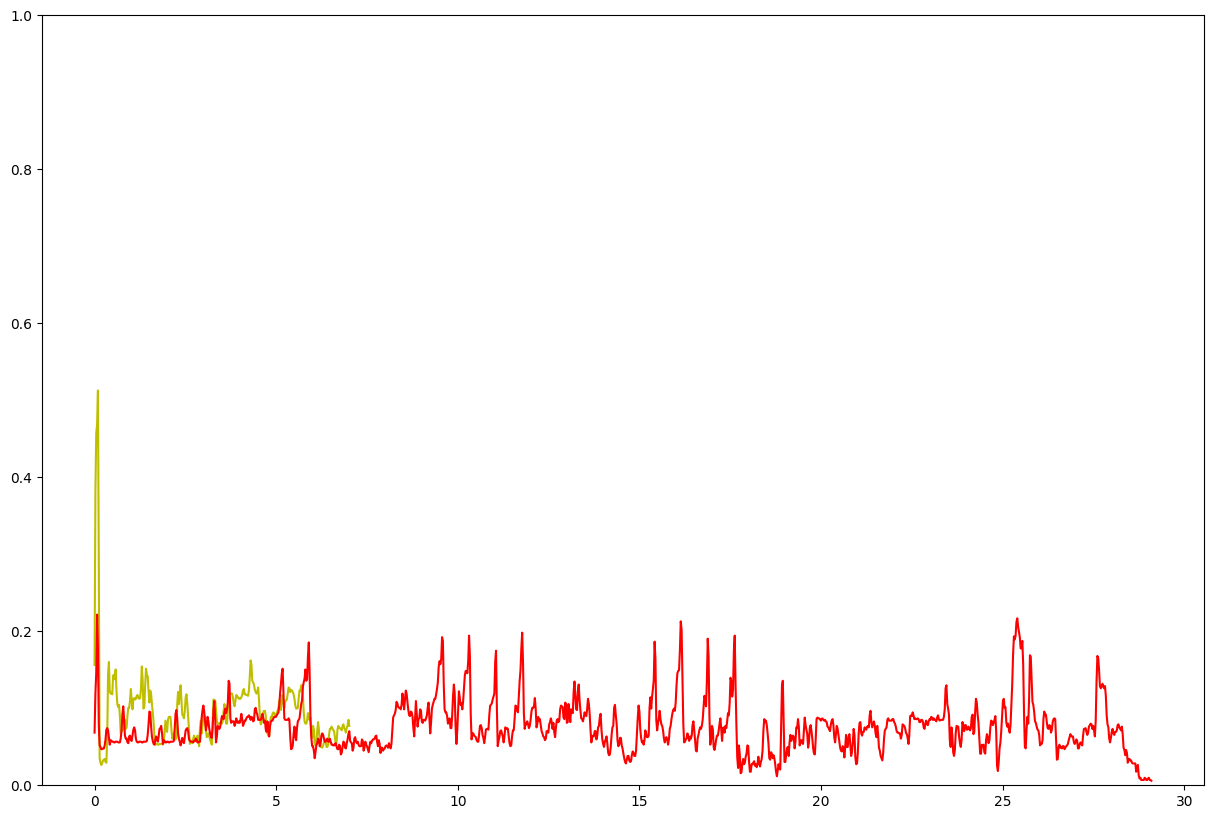

In [ ]:
plt.figure(figsize=(15, 10))

plt.plot(t, zcr_voice, color="y")
plt.plot(t2, zcr_noise, color="r")
plt.ylim(0, 1)
plt.show()

Short-Time Energy (STE)

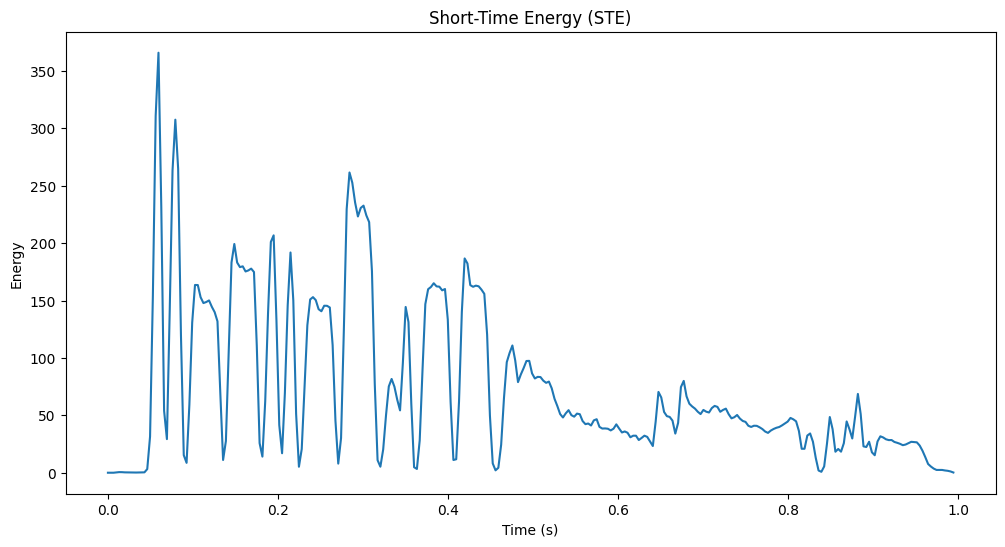

In [ ]:
from essentia.standard import Windowing, FrameGenerator

def calculateSTE(audio_signal, window_type, frame_length, hop_size):
    signal_new = []  # container for signal square
    win = Windowing(type=window_type)  # instantiate window function

    # compute signal square by frame
    for frame in FrameGenerator(audio_signal, frameSize=frame_length, hopSize=hop_size, startFromZero=True):
        frame_new = frame**2
        signal_new.append(frame_new)

    # output the sum of squares (STE) for each frame
    return np.sum(signal_new, axis=1)

# Example usage and plotting
audio_signal, _ = librosa.load(Nokia1_file)

window_type = 'hann'
frame_length = 1024
hop_size = 512

ste_values = calculateSTE(audio_signal, window_type, frame_length, hop_size)

# Plot the Short-Time Energy
plt.figure(figsize=(12, 6))
plt.plot(np.arange(0, len(ste_values)) * hop_size / len(audio_signal), ste_values)
plt.title('Short-Time Energy (STE)')
plt.xlabel('Time (s)')
plt.ylabel('Energy')
plt.show()

**Root mean square energy (RMSE)**

In [ ]:
FRAME_SIZE = 1024
HOP_LENGTH = 512

In [ ]:
rms_Nokia1 = librosa.feature.rms(y=Nokia1, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
rms_Nokia2 = librosa.feature.rms(y=Nokia2, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
rms_piano = librosa.feature.rms(y=piano, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

In [ ]:
frames1 = range(len(rms_Nokia1))
t1 = librosa.frames_to_time(frames1, hop_length=HOP_LENGTH)

frames2 = range(len(rms_Nokia2))
t2 = librosa.frames_to_time(frames2, hop_length=HOP_LENGTH)

frames3 = range(len(rms_piano))
t3 = librosa.frames_to_time(frames3, hop_length=HOP_LENGTH)

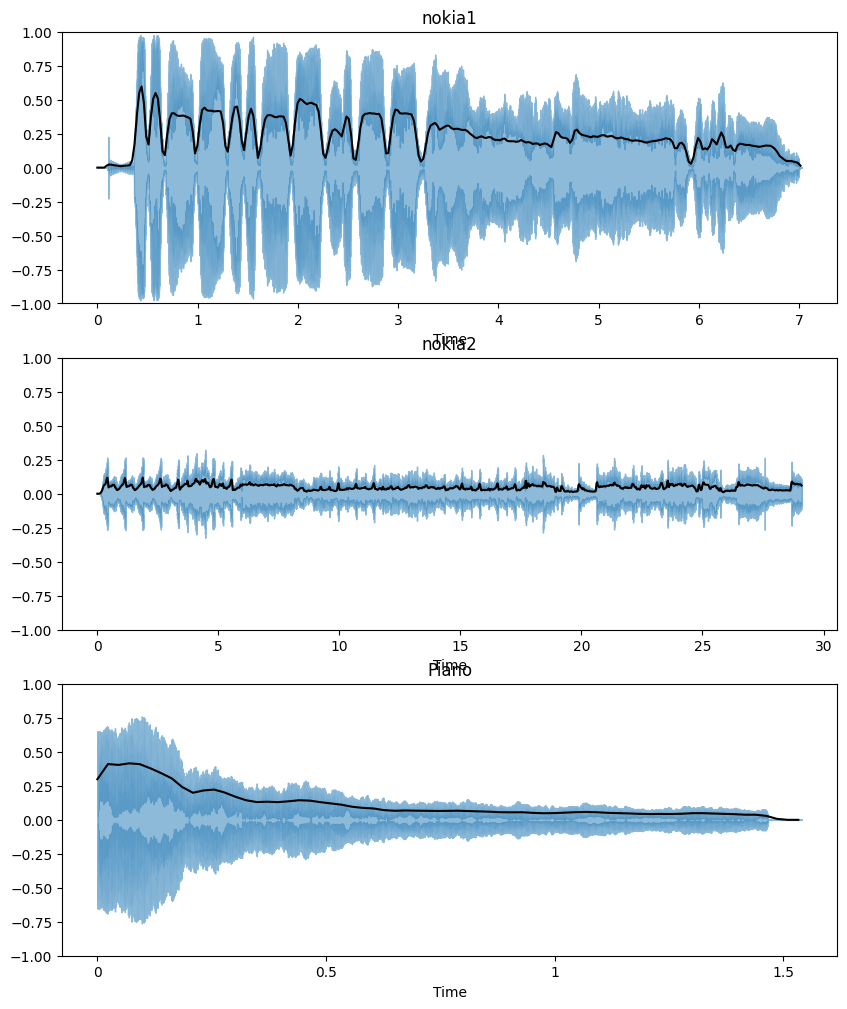

In [ ]:
# rms energy is graphed in red

plt.figure(figsize=(10, 12))

ax = plt.subplot(3, 1, 1)
librosa.display.waveshow(Nokia1, alpha=0.5)
plt.plot(t1, rms_Nokia1, color="black")
plt.ylim((-1, 1))
plt.title("nokia1")

plt.subplot(3, 1, 2)
librosa.display.waveshow(Nokia2, alpha=0.5)
plt.plot(t2, rms_Nokia2, color="black")
plt.ylim((-1, 1))
plt.title("nokia2")

plt.subplot(3, 1, 3)
librosa.display.waveshow(piano, alpha=0.5)
plt.plot(t3, rms_piano, color="black")
plt.ylim((-1, 1))
plt.title("Piano")

plt.show()

RMSE from scratch

In [ ]:
def rmse(signal, frame_size, hop_length):
    rmse = []

    # calculate rmse for each frame
    for i in range(0, len(signal), hop_length):
        rmse_current_frame = np.sqrt(sum(signal[i:i+frame_size]**2) / frame_size)
        rmse.append(rmse_current_frame)
    return np.array(rmse)

In [ ]:
rms_Nokia11 = rmse(Nokia1, FRAME_SIZE, HOP_LENGTH)
rms_Nokia21= rmse(Nokia2, FRAME_SIZE, HOP_LENGTH)
rms_piano1 = rmse(piano, FRAME_SIZE, HOP_LENGTH)

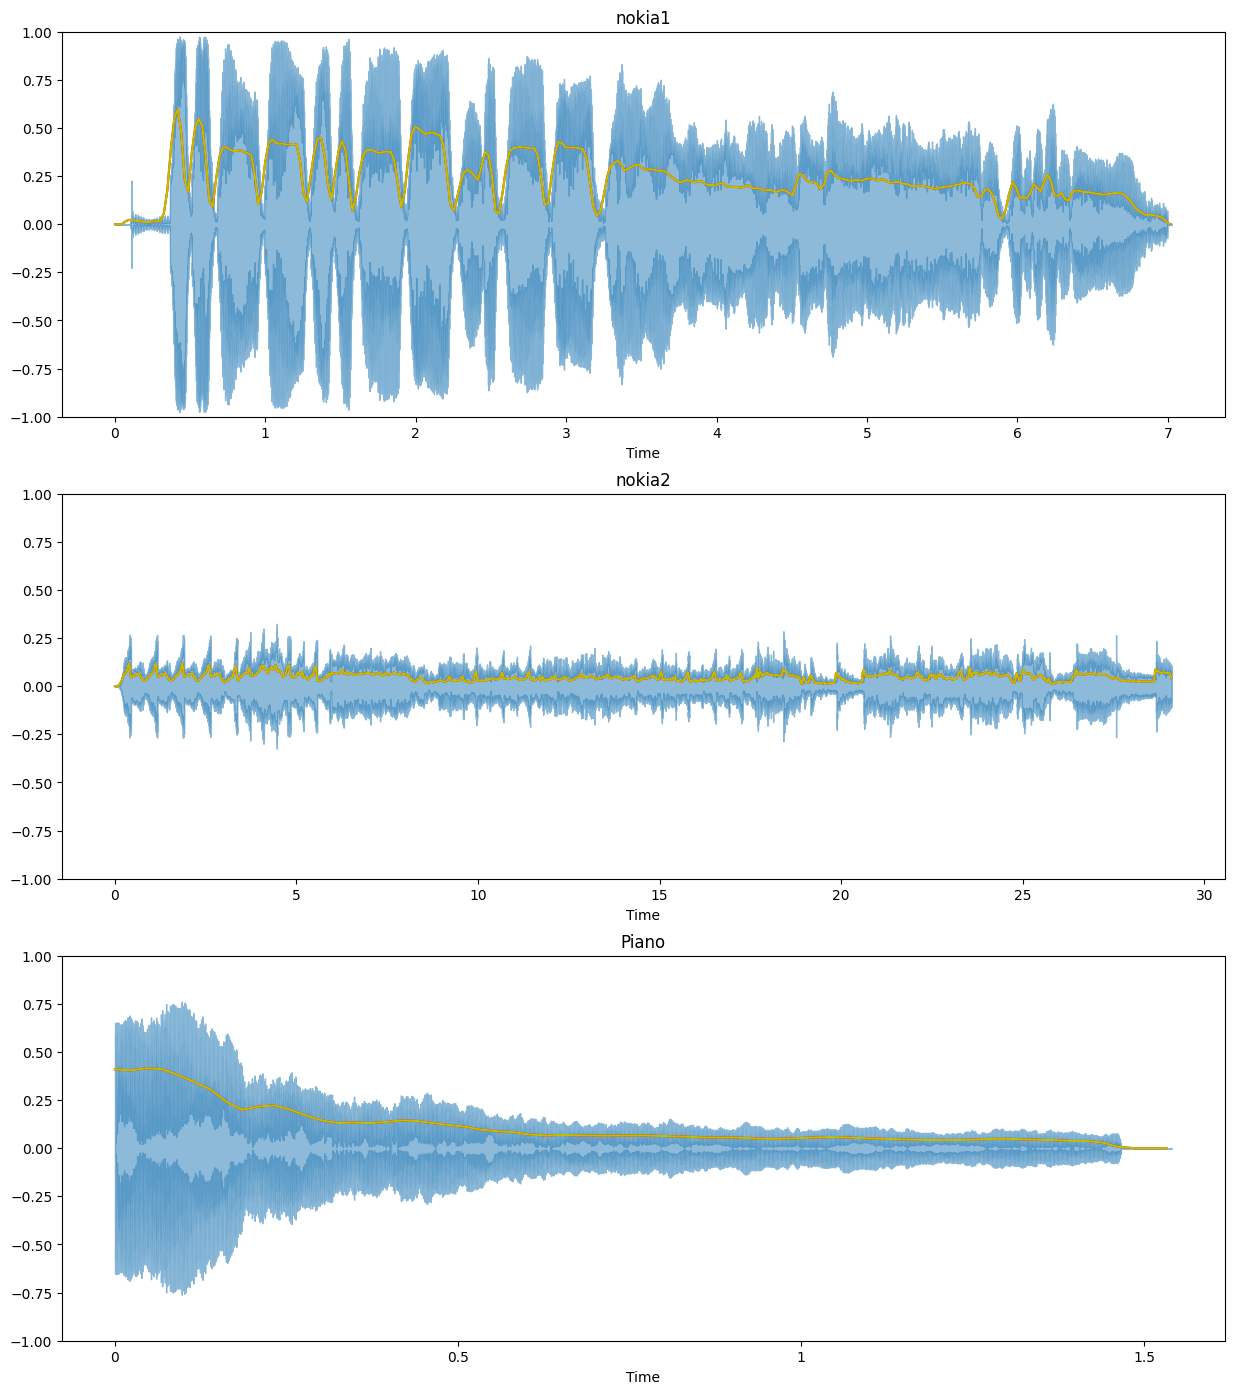

In [ ]:
plt.figure(figsize=(15, 17))

ax = plt.subplot(3, 1, 1)
librosa.display.waveshow(Nokia1, alpha=0.5)
plt.plot(t1, rms_Nokia1, color="r")
plt.plot(t1, rms_Nokia11, color="y")
plt.ylim((-1, 1))
plt.title("nokia1")

plt.subplot(3, 1, 2)
librosa.display.waveshow(Nokia2, alpha=0.5)
plt.plot(t2, rms_Nokia2, color="r")
plt.plot(t2, rms_Nokia21, color="y")
plt.ylim((-1, 1))
plt.title("nokia2")

plt.subplot(3, 1, 3)
librosa.display.waveshow(piano, alpha=0.5)
plt.plot(t3, rms_piano, color="r")
plt.plot(t3, rms_piano1, color="y")
plt.ylim((-1, 1))
plt.title("Piano")

plt.show()

Separation of Harmonic & Percussive Signals

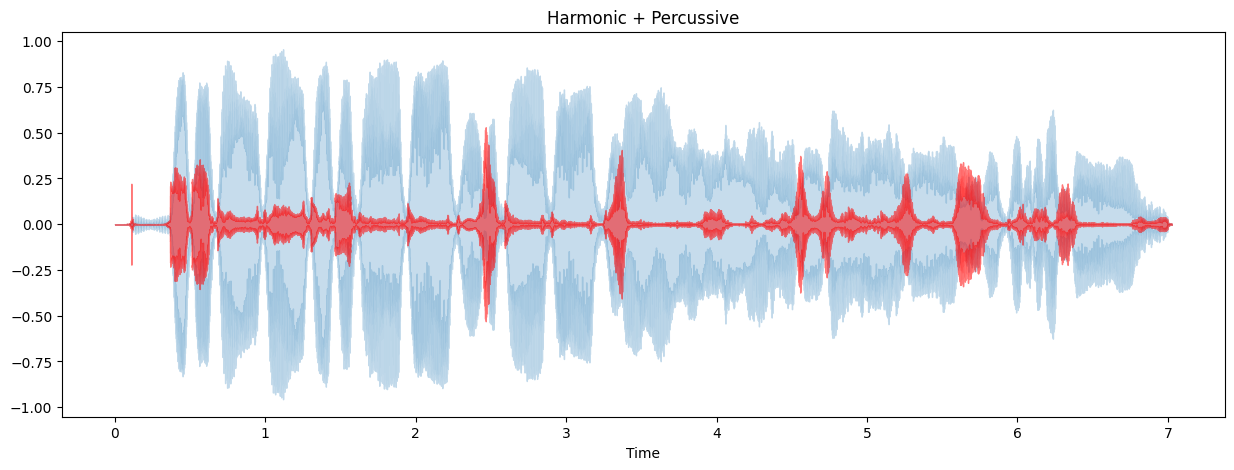

In [ ]:
y_harmonic, y_percussive = librosa.effects.hpss(y)

plt.figure(figsize=(15, 5))
librosa.display.waveshow(y_harmonic, sr=sr, alpha=0.25)
librosa.display.waveshow(y_percussive, sr=sr, color='red', alpha=0.5)
plt.title('Harmonic + Percussive')
plt.show()

**Beat Extraction**

<ipython-input-47-6bc6d5dba134>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x=beat_nums, y=beat_time_diff, palette="rocket", ax=ax)


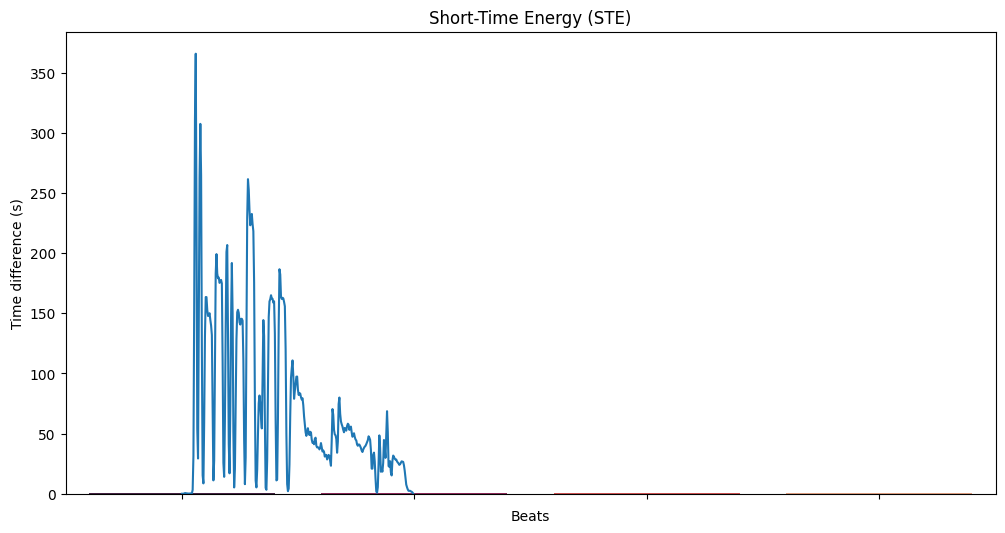

In [ ]:
from essentia.standard import Windowing, FrameGenerator

def calculateSTE(audio_signal, window_type, frame_length, hop_size):
    signal_new = []  # container for signal square
    win = Windowing(type=window_type)  # instantiate window function

    # compute signal square by frame
    for frame in FrameGenerator(audio_signal, frameSize=frame_length, hopSize=hop_size, startFromZero=True):
        frame_new = frame**2
        signal_new.append(frame_new)

    # output the sum of squares (STE) for each frame
    return np.sum(signal_new, axis=1)

audio_signal, _ = audio_signal, _ = librosa.load(Nokia1_file)

window_type = 'hann'
frame_length = 1024
hop_size = 512

ste_values = calculateSTE(audio_signal, window_type, frame_length, hop_size)

# Plot the Short-Time Energy using seaborn
plt.figure(figsize=(12, 6))
plt.plot(np.arange(0, len(ste_values)) * hop_size / len(audio_signal), ste_values)
plt.title('Short-Time Energy (STE)')
plt.xlabel('Time (s)')
plt.ylabel('Energy')

# Example seaborn barplot
beat_nums = [1, 2, 3, 4]
beat_time_diff = [0.5, 0.3, 0.7, 0.4]

ax = plt.gca()
ax.set_ylabel("Time difference (s)")
ax.set_xlabel("Beats")

# Use barplot correctly
g = sns.barplot(x=beat_nums, y=beat_time_diff, palette="rocket", ax=ax)
g.set(xticklabels=[])
plt.show()